In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

# For predictive data analysis
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_curve 


In [4]:
# Load the data

train = pd.read_csv(r"C:\Users\Madhuri\OneDrive\Desktop\07\train (1).csv", header=0)
test=pd.read_csv(r"C:\Users\Madhuri\OneDrive\Desktop\07\test (1).csv",header=0)

In [5]:
tra = pd.read_csv(r"C:\Users\Madhuri\Iris.csv", header=0)
print(tra)


      Id  Sepal_Length  Sepal_Width  Petal_Length  Petal_Width           Class
0      1           5.1          3.5           1.4          0.2     Iris-setosa
1      2           4.9          3.0           1.4          0.2     Iris-setosa
2      3           4.7          3.2           1.3          0.2     Iris-setosa
3      4           4.6          3.1           1.5          0.2     Iris-setosa
4      5           5.0          3.6           1.4          0.2     Iris-setosa
..   ...           ...          ...           ...          ...             ...
145  146           6.7          3.0           5.2          2.3  Iris-virginica
146  147           6.3          2.5           5.0          1.9  Iris-virginica
147  148           6.5          3.0           5.2          2.0  Iris-virginica
148  149           6.2          3.4           5.4          2.3  Iris-virginica
149  150           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 6 columns]


In [5]:
train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [6]:
test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [7]:
train.shape

(54808, 14)

In [8]:
test.shape

(23490, 13)

In [9]:
train.duplicated().any()

False

In [10]:
train.describe()


,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [12]:
train.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64

In [13]:
train['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [14]:
# Identify the Independent and Target variables

IndepVar = []
for col in train.columns:
    if col != 'is_promoted':
        IndepVar.append(col)

TargetVar = 'is_promoted'

x = train[IndepVar]
y = train[TargetVar]

In [15]:
train.corr()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004533,0.001274,-0.002501,0.008420,-0.000586,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.063126,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.000437,-0.081278,1.000000,0.006008,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,0.004533,-0.063126,0.006008,1.000000,0.000253,0.351578,0.027738,0.075139,0.159320
length_of_service,0.001274,-0.057275,0.657111,0.000253,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.002501,-0.045576,-0.025592,0.351578,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,0.008420,-0.007628,-0.008169,0.027738,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,-0.000586,0.042517,-0.048380,0.075139,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.159320,-0.010670,0.221582,0.195871,0.181147,1.000000


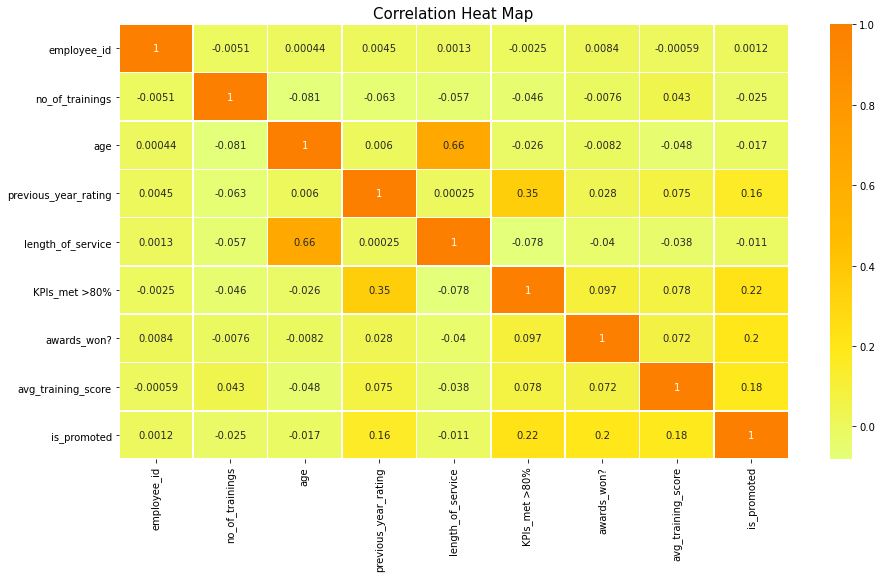

In [16]:
# lets check the Heat Map for the Data with respect to correlation.
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(train.corr(), annot = True, linewidth = 0.5, cmap = 'Wistia')
plt.title('Correlation Heat Map', fontsize = 15)
plt.show()

In [17]:
# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((38365, 13), (16443, 13), (38365,), (16443,))

In [18]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [19]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [20]:
#use LabelEncoder 
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

train['department']=LE.fit_transform(train['department'])
train['region']=LE.fit_transform(train['region'])
train['education']=LE.fit_transform(train['education'])
train['recruitment_channel']=LE.fit_transform(train['recruitment_channel'])

In [21]:
#Use LabelBinarizer 
from sklearn.preprocessing import LabelBinarizer
LB=LabelBinarizer()
train['gender']=LB.fit_transform(train[["gender"]])

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  int32  
 2   region                54808 non-null  int32  
 3   education             54808 non-null  int32  
 4   gender                54808 non-null  int32  
 5   recruitment_channel   54808 non-null  int32  
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int32(5), int64(8)
memory usage: 4.8 MB


In [23]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [24]:
# Using KNN Imputer to address  missing values

# KNNImputer(missing_values=np.nan, n_neighbors=5, weights='uniform', metric='nan_euclidean', 
# copy=True, add_indicator=False)

from sklearn.impute import KNNImputer

imputer_str = KNNImputer(missing_values=np.nan, n_neighbors=5, weights='uniform', metric='nan_euclidean', 
copy=True, add_indicator=False)

# Fill the missing values for 'Driver_Age'

train['previous_year_rating']=imputer_str.fit_transform(train[['previous_year_rating']])

In [25]:
train.isnull().sum()


employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [27]:
test.nunique()

employee_id             23490
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings             9
age                        41
previous_year_rating        5
length_of_service          34
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
dtype: int64

In [28]:
#use LabelEncoder 
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
test['department']=LE.fit_transform(test['department'])
test['region']=LE.fit_transform(test['region'])
test['education']=LE.fit_transform(test['education'])
test['recruitment_channel']=LE.fit_transform(test['recruitment_channel'])

In [29]:
#Use LabelBinarizer 
from sklearn.preprocessing import LabelBinarizer
LB=LabelBinarizer()
test['gender']=LB.fit_transform(test[["gender"]])

In [30]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [31]:
# Using KNN Imputer to address  missing values

# KNNImputer(missing_values=np.nan, n_neighbors=5, weights='uniform', metric='nan_euclidean', 
# copy=True, add_indicator=False)

from sklearn.impute import KNNImputer

imputer_str = KNNImputer(missing_values=np.nan, n_neighbors=5, weights='uniform', metric='nan_euclidean', 
copy=True, add_indicator=False)

# Fill the missing values for 'Driver_Age'

test['previous_year_rating']=imputer_str.fit_transform(test[['previous_year_rating']])

In [32]:
test.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [33]:
df1=train.copy()

In [34]:
length_of_service_UL=round(df1.length_of_service.mean()+3*df1.length_of_service.std(),3)
length_of_service_LL=round(df1.length_of_service.mean()-3*df1.length_of_service.std(),3)
df2=df1[(df1.length_of_service>length_of_service_LL)&(df1.length_of_service<length_of_service_UL)]
df2.shape

(53833, 14)

In [35]:
df3_EL=df2[(df2.length_of_service<length_of_service_LL)|(df1.length_of_service>length_of_service_UL)]
df3_EL

<ipython-input-35-64e6ba525cdd>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3_EL=df2[(df2.length_of_service<length_of_service_LL)|(df1.length_of_service>length_of_service_UL)]


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted


In [36]:
#Count the target or dependent variable by 0 and 1 and their proportion
#(>10:1 ,then the dataset is imbalance data
is_promoted_count=train.is_promoted.value_counts()
print('Class 0:',is_promoted_count[0])
print('Class 1:',is_promoted_count[1])
print('proportion :',round(is_promoted_count[0]/is_promoted_count[1],2),':1')
print('total records:',len(train))

Class 0: 50140
Class 1: 4668
proportion : 10.74 :1
total records: 54808


In [37]:
# Identify the Independent and Target variables

IndepVar = []
for col in train.columns:
    if col != 'is_promoted':
        IndepVar.append(col)

TargetVar = 'is_promoted'

x = train[IndepVar]
y = train[TargetVar]

In [38]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [39]:
# Random oversampling can be implemented using the RandomOverSampler class

from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy=0.15)

x_over, y_over = oversample.fit_resample(x, y)

print(x_over.shape)
print(y_over.shape)

(57661, 13)
(57661,)


In [40]:
# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((38365, 13), (16443, 13), (38365,), (16443,))

In [41]:
cols1=['employee_id', 'department', 'region', 'education', 'gender','recruitment_channel', 'no_of_trainings', 'age',
       'previous_year_rating','length_of_service', 'KPIs_met >80%', 'awards_won?','avg_training_score']

In [42]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols1] = mmscaler.fit_transform(x_train[cols1])
x_train = pd.DataFrame(x_train)

x_test[cols1] = mmscaler.fit_transform(x_test[cols1])
x_test = pd.DataFrame(x_test)

In [43]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols1] = mmscaler.fit_transform(x_train[cols1
                                               ])
x_train = pd.DataFrame(x_train)

x_test[cols1] = mmscaler.fit_transform(x_test[cols1])
x_test = pd.DataFrame(x_test)

In [44]:
#load the results

HRResults=pd.read_csv(r"C:\Users\Madhuri\OneDrive\Desktop\07\HTResults.csv",header=0)
HRResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[   92  1241]
 [   54 15056]]
Outcome values : 
 92 1241 54 15056
Classification report : 
               precision    recall  f1-score   support

           1       0.63      0.07      0.12      1333
           0       0.92      1.00      0.96     15110

    accuracy                           0.92     16443
   macro avg       0.78      0.53      0.54     16443
weighted avg       0.90      0.92      0.89     16443

Accuracy : 92.1 %
Precision : 63.0 %
Recall : 6.9 %
F1 Score : 0.124
Specificity or True Negative Rate : 99.6 %
Balanced Accuracy : 53.2 %
MCC : 0.19
roc_auc_score: 0.533


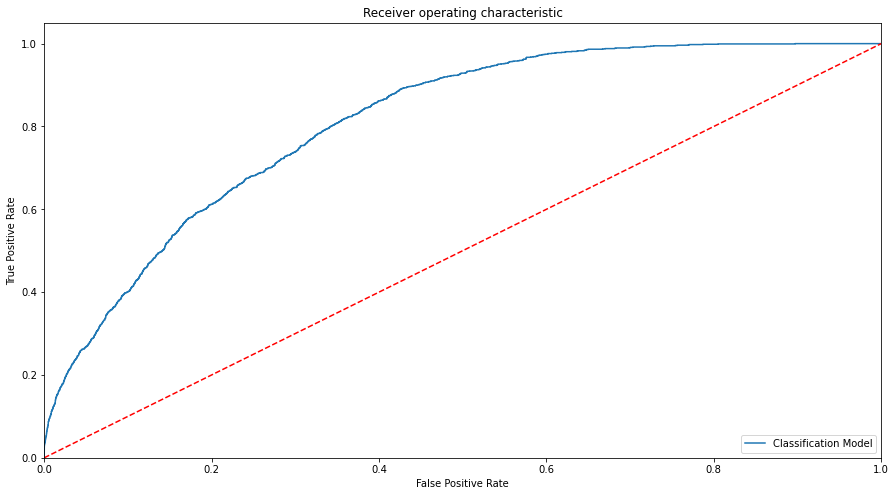

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[  591   742]
 [  972 14138]]
Outcome values : 
 591 742 972 14138
Classification report : 
               precision    recall  f1-score   support

           1       0.38      0.44      0.41      1333
           0       0.95      0.94      0.94     15110

    accuracy                           0.90     16443
   macro avg       0.66      0.69      0.68     16443
weighted avg       0.90      0.90      0.90     16443

Accuracy : 89.6 %
Precision : 37.8 %
Recall : 44.3 %
F1 Score : 0.408
Specificity or True Negative Rate : 93.6 %
Balanced Accuracy : 69.0 %
MCC : 0.353
roc_auc_score: 0.69


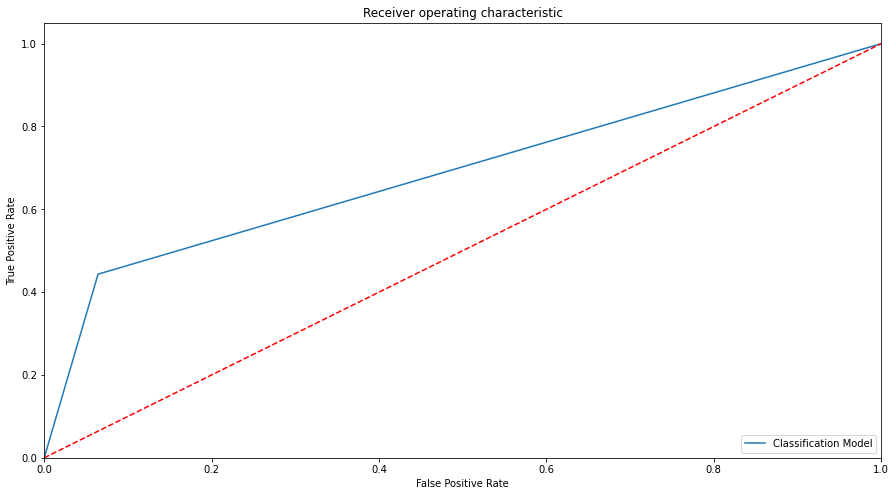

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[  347   986]
 [   36 15074]]
Outcome values : 
 347 986 36 15074
Classification report : 
               precision    recall  f1-score   support

           1       0.91      0.26      0.40      1333
           0       0.94      1.00      0.97     15110

    accuracy                           0.94     16443
   macro avg       0.92      0.63      0.69     16443
weighted avg       0.94      0.94      0.92     16443

Accuracy : 93.8 %
Precision : 90.6 %
Recall : 26.0 %
F1 Score : 0.404
Specificity or True Negative Rate : 99.8 %
Balanced Accuracy : 62.9 %
MCC : 0.467
roc_auc_score: 0.629


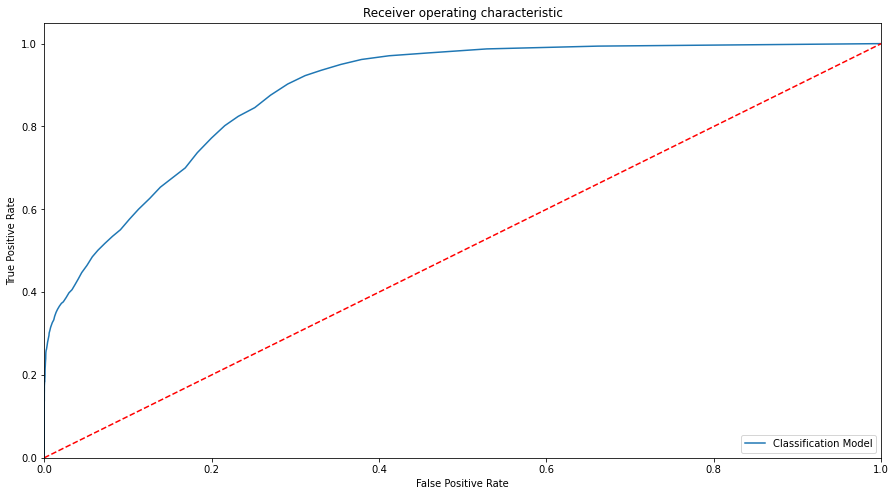

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[  288  1045]
 [   73 15037]]
Outcome values : 
 288 1045 73 15037
Classification report : 
               precision    recall  f1-score   support

           1       0.80      0.22      0.34      1333
           0       0.94      1.00      0.96     15110

    accuracy                           0.93     16443
   macro avg       0.87      0.61      0.65     16443
weighted avg       0.92      0.93      0.91     16443

Accuracy : 93.2 %
Precision : 79.8 %
Recall : 21.6 %
F1 Score : 0.34
Specificity or True Negative Rate : 99.5 %
Balanced Accuracy : 60.6 %
MCC : 0.393
roc_auc_score: 0.606


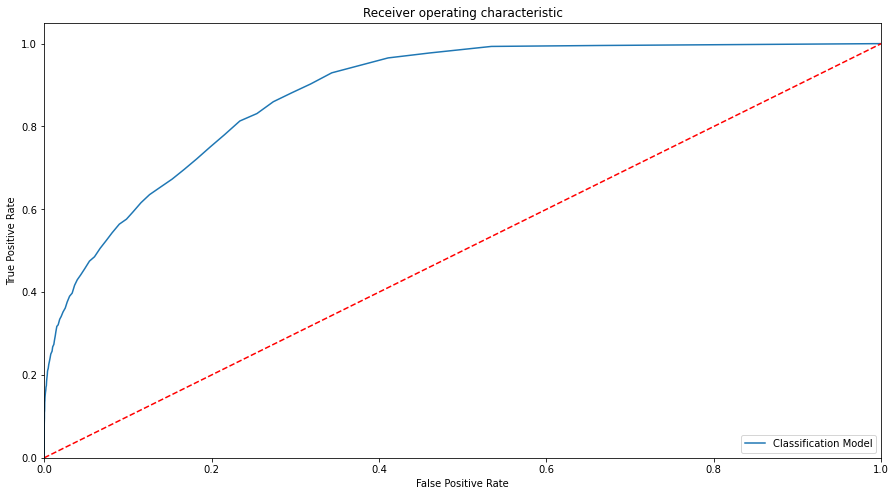

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[  182  1151]
 [  207 14903]]
Outcome values : 
 182 1151 207 14903
Classification report : 
               precision    recall  f1-score   support

           1       0.47      0.14      0.21      1333
           0       0.93      0.99      0.96     15110

    accuracy                           0.92     16443
   macro avg       0.70      0.56      0.58     16443
weighted avg       0.89      0.92      0.90     16443

Accuracy : 91.7 %
Precision : 46.8 %
Recall : 13.7 %
F1 Score : 0.211
Specificity or True Negative Rate : 98.6 %
Balanced Accuracy : 56.2 %
MCC : 0.221
roc_auc_score: 0.561


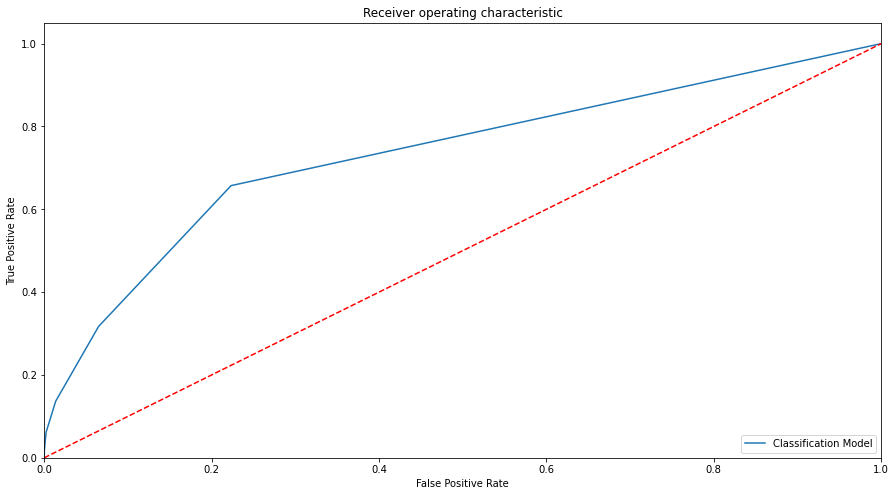

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[   98  1235]
 [   20 15090]]
Outcome values : 
 98 1235 20 15090
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.07      0.14      1333
           0       0.92      1.00      0.96     15110

    accuracy                           0.92     16443
   macro avg       0.88      0.54      0.55     16443
weighted avg       0.92      0.92      0.89     16443

Accuracy : 92.4 %
Precision : 83.1 %
Recall : 7.4 %
F1 Score : 0.135
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 53.6 %
MCC : 0.233
roc_auc_score: 0.536


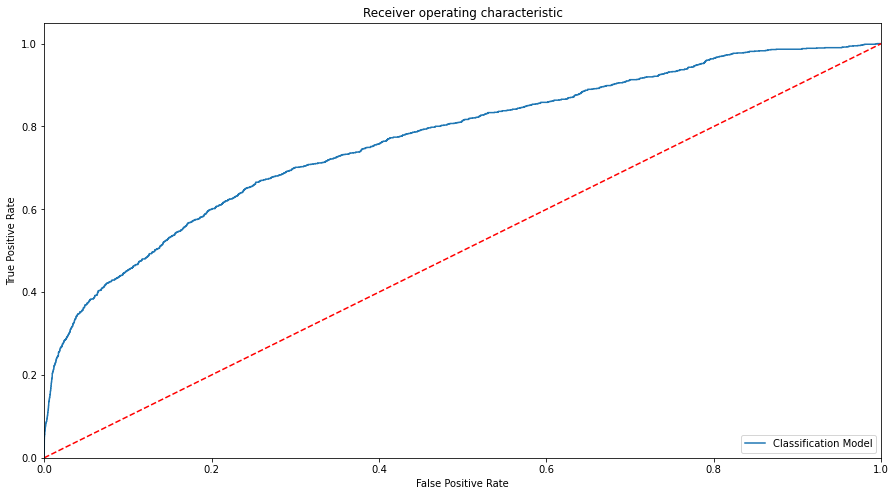

-----------------------------------------------------------------------------------------------------
Model Name:  BaggingClassifier(base_estimator=None, n_estimators=100)
Confusion matrix : 
 [[  455   878]
 [   67 15043]]
Outcome values : 
 455 878 67 15043
Classification report : 
               precision    recall  f1-score   support

           1       0.87      0.34      0.49      1333
           0       0.94      1.00      0.97     15110

    accuracy                           0.94     16443
   macro avg       0.91      0.67      0.73     16443
weighted avg       0.94      0.94      0.93     16443

Accuracy : 94.3 %
Precision : 87.2 %
Recall : 34.1 %
F1 Score : 0.491
Specificity or True Negative Rate : 99.6 %
Balanced Accuracy : 66.8 %
MCC : 0.524
roc_auc_score: 0.668


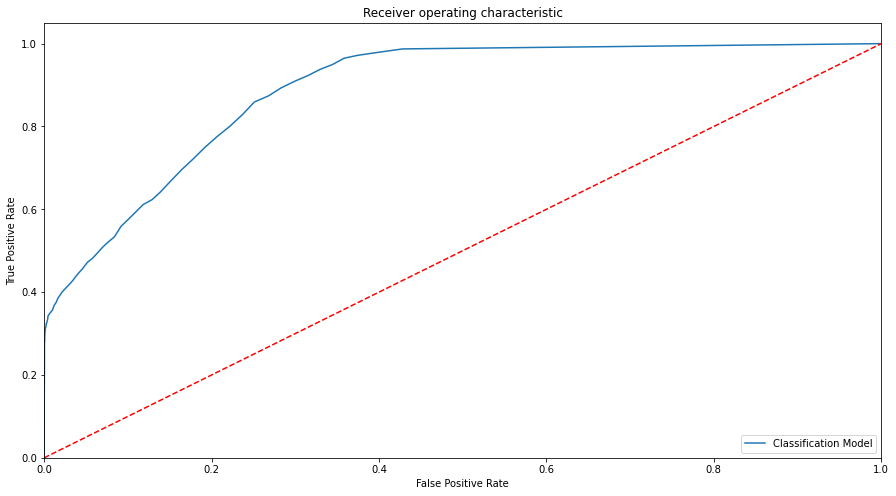

-----------------------------------------------------------------------------------------------------


C:\Users\Madhuri\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


Model Name:  GradientBoostingClassifier(loss='deviance')
Confusion matrix : 
 [[  376   957]
 [   18 15092]]
Outcome values : 
 376 957 18 15092
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.28      0.44      1333
           0       0.94      1.00      0.97     15110

    accuracy                           0.94     16443
   macro avg       0.95      0.64      0.70     16443
weighted avg       0.94      0.94      0.93     16443

Accuracy : 94.1 %
Precision : 95.4 %
Recall : 28.2 %
F1 Score : 0.435
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 64.0 %
MCC : 0.501
roc_auc_score: 0.64


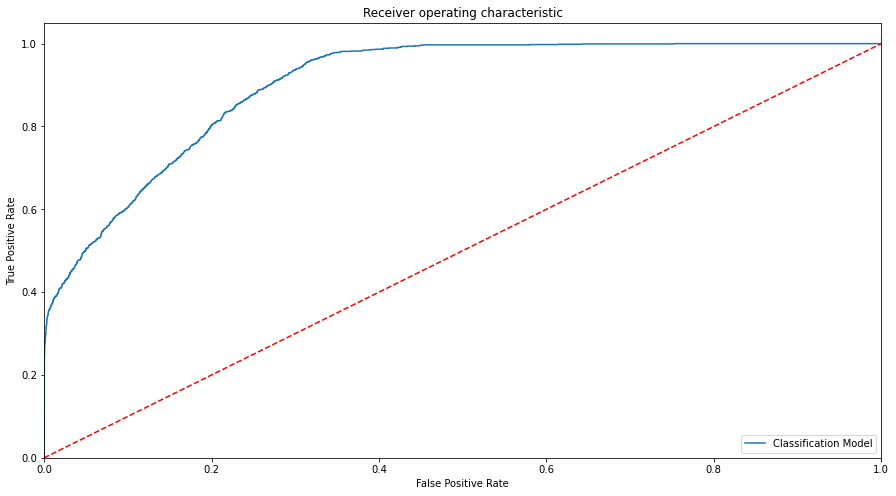

-----------------------------------------------------------------------------------------------------
Model Name:  LGBMClassifier()
Confusion matrix : 
 [[  471   862]
 [   31 15079]]
Outcome values : 
 471 862 31 15079
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.35      0.51      1333
           0       0.95      1.00      0.97     15110

    accuracy                           0.95     16443
   macro avg       0.94      0.68      0.74     16443
weighted avg       0.95      0.95      0.93     16443

Accuracy : 94.6 %
Precision : 93.8 %
Recall : 35.3 %
F1 Score : 0.513
Specificity or True Negative Rate : 99.8 %
Balanced Accuracy : 67.6 %
MCC : 0.557
roc_auc_score: 0.676


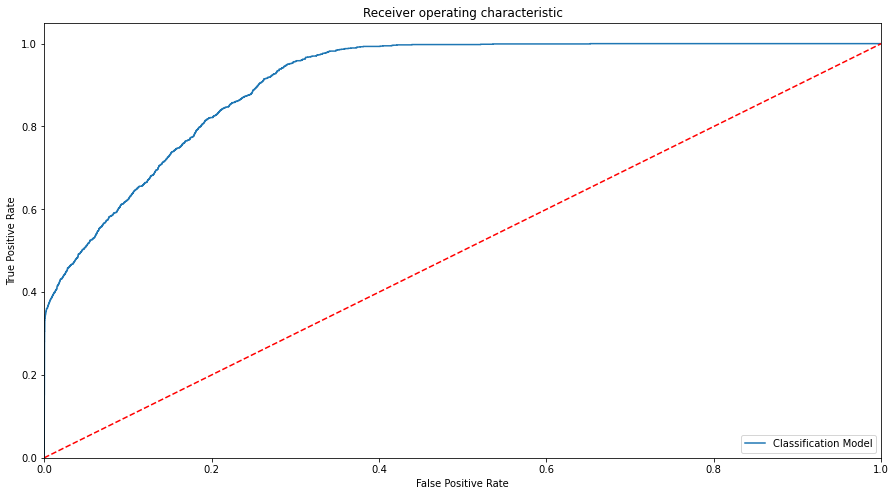

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[  161  1172]
 [  216 14894]]
Outcome values : 
 161 1172 216 14894
Classification report : 
               precision    recall  f1-score   support

           1       0.43      0.12      0.19      1333
           0       0.93      0.99      0.96     15110

    accuracy                           0.92     16443
   macro avg       0.68      0.55      0.57     16443
weighted avg       0.89      0.92      0.89     16443

Accuracy : 91.6 %
Precision : 42.7 %
Recall : 12.1 %
F1 Score : 0.188
Specificity or True Negative Rate : 98.6 %
Balanced Accuracy : 55.4 %
MCC : 0.194
roc_auc_score: 0.553


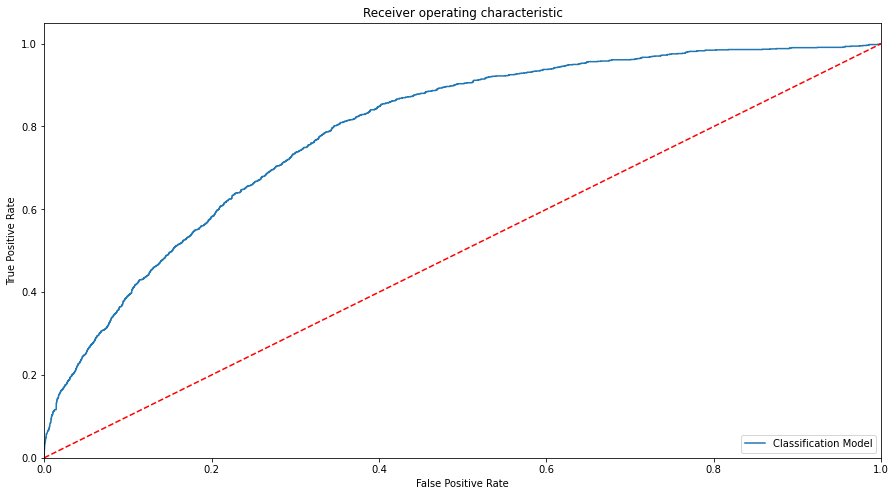

-----------------------------------------------------------------------------------------------------


In [45]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSVM = SVC(probability=True)
modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,bootstrap=True, 
                             bootstrap_features=False, oob_score=False, warm_start=False,n_jobs=None, random_state=None, 
                             verbose=0)
ModelGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1,n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, 
                                     init=None,random_state=None,max_features=None, verbose=0, max_leaf_nodes=None, 
                                     warm_start=False,validation_fraction=0.1, n_iter_no_change=None, tol=0.0001,
                                     ccp_alpha=0.0)
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()

MM2= [ModelLR, ModelDC, ModelRF, ModelET,ModelKNN, ModelSVM, modelBAG,ModelGB, ModelLGB, ModelGNB]
for models in MM2:
            
    # Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, y_pred), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, y_pred)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC': MCC,
               'ROC_AUC_Score':roc_auc_score(actual, y_pred),
               'Balanced Accuracy':balanced_accuracy}
    CSResults= HRResults.append(new_row, ignore_index=True)

In [56]:
 CSResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,GaussianNB(),161,1172,216,14894,0.916,0.427,0.121,0.188,0.986,0.194,0.553243,0.554


In [47]:
# Copy 10% data (stratified split on target variable) to new dataset 
merge_claim_2_ht = train.groupby('is_promoted', group_keys=False).apply(lambda x: x.sample(frac=0.2))

# Display the shape

merge_claim_2_ht.shape

(10962, 14)

In [48]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 

Grid_Params = {'max_depth': [2, 3, 5, 10, 20],
               'min_samples_leaf': [5, 10, 20, 50, 100],
               'criterion': ["gini", "entropy"]
               }

ModelDT = DecisionTreeClassifier(random_state=42)

# Instantiate the grid search model

Grid_search = GridSearchCV(estimator=ModelDT, param_grid=Grid_Params, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data

Grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             verbose=2)

In [49]:
# Best parameter from gridseachCV

Grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10}

Confusion matrix : 
 [[  131  1202]
 [    4 15106]]
Outcome values : 
 131 1202 4 15106
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.10      0.18      1333
           0       0.93      1.00      0.96     15110

    accuracy                           0.93     16443
   macro avg       0.95      0.55      0.57     16443
weighted avg       0.93      0.93      0.90     16443

Accuracy : 92.7 %
Precision : 97.0 %
Recall : 9.8 %
F1 Score : 0.178
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 54.9 %
MCC : 0.296
roc_auc_score: 0.549


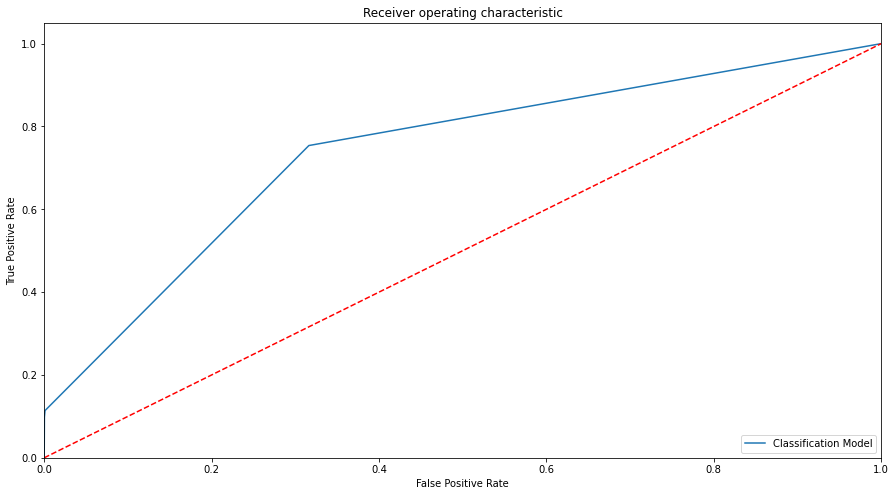

-----------------------------------------------------------------------------------------------------


In [50]:
# To build the 'Decision Tree' model Random sampling - Hyperparameter tuning with GridSearchCV  

from sklearn.tree import DecisionTreeClassifier 

ModelDT = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini', max_depth=2, max_features=None,
                                 max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                 min_samples_leaf=5, min_samples_split=2,min_weight_fraction_leaf=0.0,
                                 random_state=None, splitter='best')

# Train the model with train data 

ModelDT.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelDT.predict(x_test)
y_pred_prob = ModelDT.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3)
specificity = round(tn/(tn+fp), 3)
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
precision = round(tp/(tp+fp), 3)
f1Score = round((2*tp/(2*tp + fp + fn)), 3)

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelDT.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModelDT,
           'True_Positive': tp,
           'False_Negative': fn, 
           'False_Positive': fp, 
           'True_Negative': tn,
           'Accuracy' : accuracy,
           'Precision' : precision,
           'Recall' : sensitivity,
           'F1 Score' : f1Score,
           'Specificity' : specificity,
           'MCC':MCC,
           'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
           'Balanced Accuracy':balanced_accuracy}
HTResults = CSResults.append(new_row, ignore_index=True)
#----------------------------------------------------------------------------------------------------------

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Madhuri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


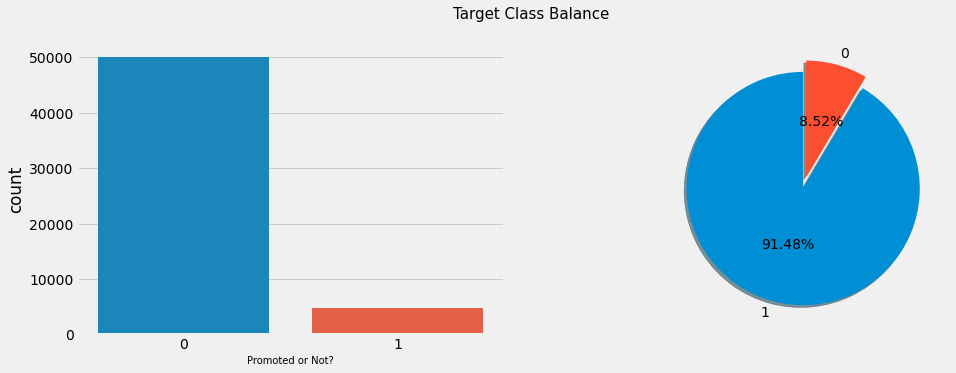

In [52]:
# lets check the Target Class Balance

plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
sns.countplot(train['is_promoted'],)

plt.xlabel('Promoted or Not?', fontsize = 10)

plt.subplot(1, 2, 2)
train['is_promoted'].value_counts().plot(kind = 'pie', explode = [0, 0.1], autopct = '%.2f%%', startangle = 90,
                                       labels = ['1','0'], shadow = True, pctdistance = 0.5)
plt.axis('off')

plt.suptitle('Target Class Balance', fontsize = 15)
plt.show()

ValueError: 'label' must be of length 'x'

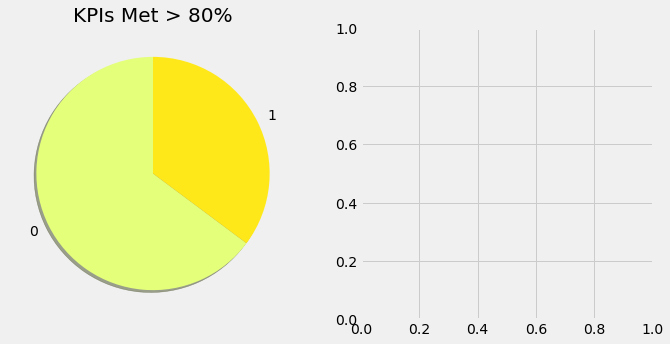

In [53]:
# lets plot pie chart for the columns where we have very few categories
plt.rcParams['figure.figsize'] = (16,5)
plt.style.use('fivethirtyeight')

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 1)
labels = ['0','1']
sizes = train['KPIs_met >80%'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0, 0]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('KPIs Met > 80%', fontsize = 20)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 2)
labels = ['1', '2', '3', '4', '5']
sizes = train['previous_year_rating'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0, 0, 0, 0, 0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Previous year Ratings', fontsize = 20)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 3)
labels = ['0', '1']
sizes = train['awards_won?'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0,0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Awards Won?', fontsize = 20)


plt.legend()
plt.show()